In [115]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np  

## Actual data

In [116]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [289]:
actuals = pd.read_excel("Train/Actuals_part1.xlsx")

In [290]:
actuals.head()

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh)
0,2017-03-18 00:00:00,1031471.62806,1012.48000,2.12500,79.33333,16.76439,285.25000,6.25375
1,2017-03-18 01:00:00,1007205.57844,1011.61875,0.00000,82.16667,15.72939,285.00000,9.20500
2,2017-03-18 02:00:00,986108.40072,1010.72000,2.12500,81.66667,15.81689,316.00000,11.28375
3,2017-03-18 03:00:00,970760.96692,1011.37625,17.12500,82.25000,15.91939,327.00000,7.16875
4,2017-03-18 04:00:00,962258.36502,1011.50000,18.62500,82.33333,15.76939,282.25000,0.78000


In [291]:
actuals.tail()

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh)
31907,2020-11-06 11:00:00,1242829.91614,1012.85000,45.62500,68.16667,21.29939,335.25000,8.28000
31908,2020-11-06 12:00:00,1239479.53614,1011.75000,48.87500,67.16667,22.41939,261.25000,11.46625
31909,2020-11-06 13:00:00,1234773.33214,1010.93750,55.37500,67.58333,22.97189,296.25000,14.50750
31910,2020-11-06 14:00:00,1240139.89814,1010.25000,55.00000,66.25000,24.31439,289.00000,16.39750
31911,2020-11-06 15:00:00,1222309.30947,1009.75000,54.50000,66.66667,24.13189,296.33333,19.64667


In [292]:
actuals.iloc[:len(actuals)-16]

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh)
0,2017-03-18 00:00:00,1031471.62806,1012.48000,2.12500,79.33333,16.76439,285.25000,6.25375
1,2017-03-18 01:00:00,1007205.57844,1011.61875,0.00000,82.16667,15.72939,285.00000,9.20500
2,2017-03-18 02:00:00,986108.40072,1010.72000,2.12500,81.66667,15.81689,316.00000,11.28375
3,2017-03-18 03:00:00,970760.96692,1011.37625,17.12500,82.25000,15.91939,327.00000,7.16875
4,2017-03-18 04:00:00,962258.36502,1011.50000,18.62500,82.33333,15.76939,282.25000,0.78000
...,...,...,...,...,...,...,...,...
31891,2020-11-05 19:00:00,1141299.02814,1010.35000,53.37500,69.33333,18.31939,342.00000,10.18625
31892,2020-11-05 20:00:00,1112589.66414,1011.10000,36.87500,69.33333,17.81939,221.50000,8.77000
31893,2020-11-05 21:00:00,1086038.13814,1011.56250,33.87500,69.33333,17.64189,5.12500,9.94125
31894,2020-11-05 22:00:00,1062102.90214,1011.45000,58.62500,70.50000,16.49939,180.75000,10.16250


remove the last 16 records so that it ends at the end of 2020-11-05

In [293]:
actuals = actuals.iloc[:len(actuals)-16]

In [294]:
actuals.tail()

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh)
31891,2020-11-05 19:00:00,1141299.02814,1010.35000,53.37500,69.33333,18.31939,342.00000,10.18625
31892,2020-11-05 20:00:00,1112589.66414,1011.10000,36.87500,69.33333,17.81939,221.50000,8.77000
31893,2020-11-05 21:00:00,1086038.13814,1011.56250,33.87500,69.33333,17.64189,5.12500,9.94125
31894,2020-11-05 22:00:00,1062102.90214,1011.45000,58.62500,70.50000,16.49939,180.75000,10.16250
31895,2020-11-05 23:00:00,1022583.90014,1011.38750,53.62500,71.83333,15.09689,15.87500,10.09375


### Data statistical summary:

In [122]:
actuals.shape

(31896, 8)

In [123]:
actuals.describe()

,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh)
count,31896.00000,31896.00000,31896.00000,31896.00000,31896.00000,31896.00000,31896.00000
mean,1152592.77177,1009.22106,40.84949,80.22865,17.00032,212.16546,12.94756
std,150638.32604,4.02604,32.58624,11.20811,5.63216,91.60990,6.68346
min,845471.35814,950.59500,0.00000,33.33333,-6.41811,0.00000,0.00000
25%,1031659.87271,1006.02500,9.62500,72.91667,13.65876,134.87500,7.83000
50%,1114830.09114,1009.57063,42.50000,82.37500,16.97939,240.00000,12.29375
75%,1259434.62864,1012.25000,75.00000,89.08333,20.67189,284.62500,18.06906
max,1605192.04314,1022.91500,100.00000,100.00000,39.06689,357.37500,91.49750


### Checking for data types:

In [124]:
actuals.dtypes

Time                    datetime64[ns]
Load (kW)                      float64
Pressure_kpa                   float64
Cloud Cover (%)                float64
Humidity (%)                   float64
Temperature (C)                float64
Wind Direction (deg)           float64
Wind Speed (kmh)               float64
dtype: object

### Checking for missing data:

In [125]:
actuals.isnull().sum()

Time                    0
Load (kW)               0
Pressure_kpa            0
Cloud Cover (%)         0
Humidity (%)            0
Temperature (C)         0
Wind Direction (deg)    0
Wind Speed (kmh)        0
dtype: int64

In [126]:
actuals.isna().sum()

Time                    0
Load (kW)               0
Pressure_kpa            0
Cloud Cover (%)         0
Humidity (%)            0
Temperature (C)         0
Wind Direction (deg)    0
Wind Speed (kmh)        0
dtype: int64

### Finding outliers:

In [127]:
def find_outliers(df, column):
    
    q1=df.quantile(0.25)[column]

    q3=df.quantile(0.75)[column]

    IQR=q3-q1

    outliers = df[((df[column]<(q1-1.5*IQR)) | (df[column]>(q3+1.5*IQR)))]

    return outliers

In [128]:
outliers = find_outliers(actuals, 'Pressure_kpa')

In [129]:
outliers

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh)
695,2017-04-15 23:00:00,1089793.73534,996.02125,40.87500,83.33333,15.52189,197.87500,18.62750
1356,2017-05-13 12:00:00,1293908.52014,1021.80750,42.50000,79.00000,24.64189,265.37500,16.07625
1357,2017-05-13 13:00:00,1292135.79814,1022.91500,44.00000,77.25000,29.65189,279.50000,18.33375
1521,2017-05-20 09:00:00,1222820.79274,954.52750,30.37500,75.41667,24.80689,191.87500,15.13500
1522,2017-05-20 10:00:00,1280126.83814,950.59500,31.00000,75.33333,26.61439,209.62500,19.38750
...,...,...,...,...,...,...,...,...
29366,2020-07-23 14:00:00,1124788.00814,995.93750,100.00000,94.33333,15.18439,253.87500,24.93375
29367,2020-07-23 15:00:00,1105991.64214,995.81250,100.00000,96.75000,12.29439,259.25000,28.50875
29368,2020-07-23 16:00:00,1091739.74814,995.80000,100.00000,99.91667,11.90689,259.37500,41.23500
29369,2020-07-23 17:00:00,1076333.78214,996.01250,100.00000,99.33333,12.24689,262.00000,29.39750


### Plotting time vs load:

Looks like a yearly trend? Load keeps going down until the end of each year and then goes up.

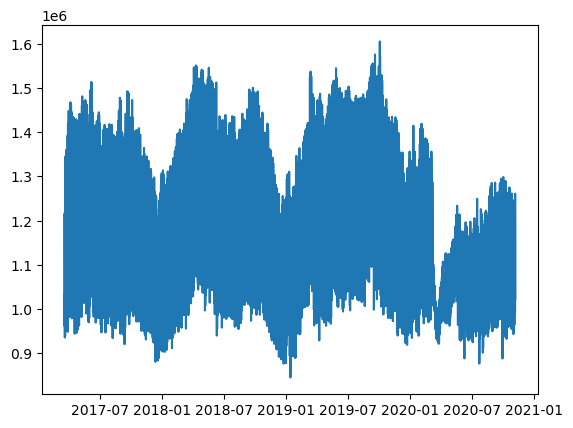

In [130]:
plt.plot(actuals["Time"], actuals['Load (kW)'])

Text(0.5, 1.0, 'Electricity demand')

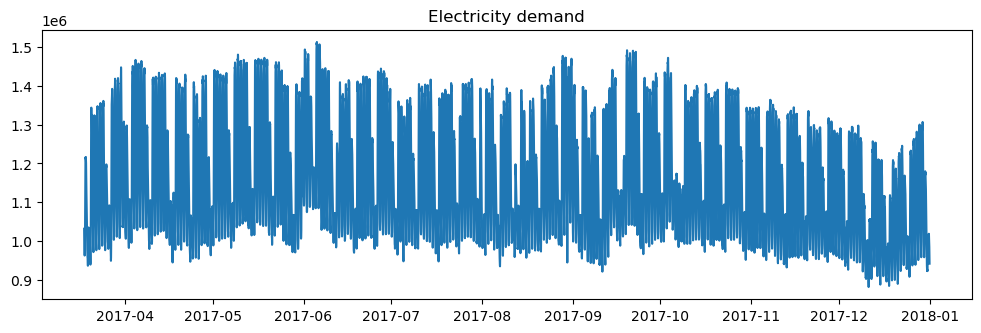

In [131]:
fig, ax = plt.subplots(figsize=(12, 3.5))


data = actuals[(actuals['Time'] >= datetime(2017, 1, 1 , 0, 0, 0)) & (actuals['Time'] <= datetime(2018, 1,1, 0, 0, 0))]

ax.plot(data.Time, data['Load (kW)'])


ax.set_title('Electricity demand')

### Detecting seasonalities:

In [132]:
temp_df = actuals

In [133]:
temp_df['Month'] = [date.month for date in actuals.Time]

In [134]:
temp_df['Year'] = [date.year for date in actuals.Time]

In [135]:
temp_df['day'] = [date.day for date in actuals.Time]

In [136]:
temp_df['hour'] = [date.hour for date in actuals.Time]

In [137]:
temp_df["type_of_day"] = [date.weekday() + 1 for date in actuals.Time]

In [138]:
temp_df.head()

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Month,Year,day,hour,type_of_day
0,2017-03-18 00:00:00,1031471.62806,1012.48000,2.12500,79.33333,16.76439,285.25000,6.25375,3,2017,18,0,6
1,2017-03-18 01:00:00,1007205.57844,1011.61875,0.00000,82.16667,15.72939,285.00000,9.20500,3,2017,18,1,6
2,2017-03-18 02:00:00,986108.40072,1010.72000,2.12500,81.66667,15.81689,316.00000,11.28375,3,2017,18,2,6
3,2017-03-18 03:00:00,970760.96692,1011.37625,17.12500,82.25000,15.91939,327.00000,7.16875,3,2017,18,3,6
4,2017-03-18 04:00:00,962258.36502,1011.50000,18.62500,82.33333,15.76939,282.25000,0.78000,3,2017,18,4,6


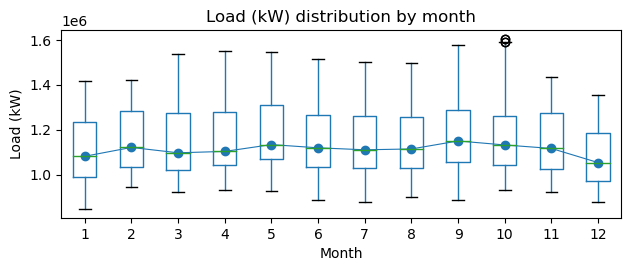

In [139]:
# Boxplot for annual seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 2.5))
temp_df.boxplot(column='Load (kW)', by='Month', ax=ax,)
temp_df.groupby('Month')['Load (kW)'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Load (kW)')
ax.set_title('Load (kW) distribution by month')
fig.suptitle('');

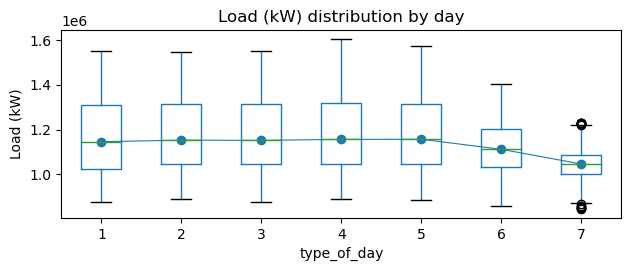

In [140]:
# Boxplot for weekly seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 2.5))
temp_df.boxplot(column='Load (kW)', by='type_of_day', ax=ax,)
temp_df.groupby('type_of_day')['Load (kW)'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Load (kW)')
ax.set_title('Load (kW) distribution by day')
fig.suptitle('');

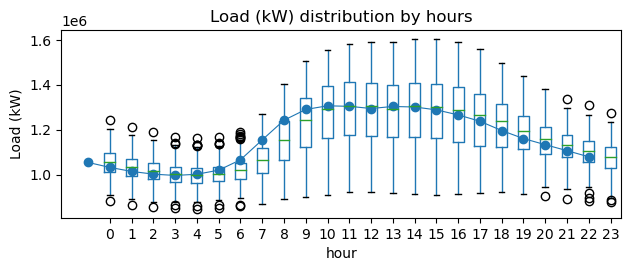

In [141]:
# Boxplot for daily seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 2.5))
temp_df.boxplot(column='Load (kW)', by='hour', ax=ax,)
temp_df.groupby('hour')['Load (kW)'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Load (kW)')
ax.set_title('Load (kW) distribution by hours')
fig.suptitle('');

## Merging the forecast dataset

In [142]:
forecasts = pd.concat([pd.read_excel("Train/forecasts_part1/Cloudcover_percent.xlsx"),
                       pd.read_excel("Train/forecasts_part1/Pressure_kpa.xlsx")['Pressure (kpa)'],
                       pd.read_excel("Train/forecasts_part1/Temperature_Celcius.xlsx")['Temperature (C)'],
                       pd.read_excel("Train/forecasts_part1/Winddirection_degree.xlsx")['Wind Direction (deg)'],
                       pd.read_excel("Train/forecasts_part1/Windspeed_kmh.xlsx")['Wind Speed (kmh)'],
                      ],
                      axis="columns")

In [143]:
forecasts.head()

,Cloud Cover (%),Time,Pressure (kpa),Temperature (C),Wind Direction (deg),Wind Speed (kmh)
0,3,2017-03-18 00:00:00,1011,14,307,2
1,4,2017-03-18 01:00:00,1011,14,215,2
2,4,2017-03-18 02:00:00,1011,14,123,1
3,4,2017-03-18 03:00:00,1011,14,31,1
4,4,2017-03-18 04:00:00,1011,14,138,1


In [144]:
forecasts.dtypes

Cloud Cover (%)                  int64
Time                    datetime64[ns]
Pressure (kpa)                   int64
Temperature (C)                  int64
Wind Direction (deg)             int64
Wind Speed (kmh)                 int64
dtype: object

### Data statistical summary:

In [145]:
forecasts.shape

(32160, 6)

In [146]:
forecasts.describe()

,Cloud Cover (%),Pressure (kpa),Temperature (C),Wind Direction (deg),Wind Speed (kmh)
count,32160.00000,32160.00000,32160.00000,32160.00000,32160.00000
mean,29.36281,1009.13035,16.55498,215.77488,13.91517
std,30.83798,3.91725,4.74993,93.28696,7.58238
min,0.00000,994.00000,-40.00000,0.00000,0.00000
25%,2.00000,1006.00000,14.00000,167.00000,8.00000
50%,14.00000,1009.00000,16.00000,242.00000,12.00000
75%,57.00000,1012.00000,20.00000,284.00000,18.00000
max,100.00000,1020.00000,34.00000,360.00000,65.00000


### Checking for missing data:

In [147]:
forecasts.isnull().sum()

Cloud Cover (%)         0
Time                    0
Pressure (kpa)          0
Temperature (C)         0
Wind Direction (deg)    0
Wind Speed (kmh)        0
dtype: int64

In [148]:
forecasts.isna().sum()

Cloud Cover (%)         0
Time                    0
Pressure (kpa)          0
Temperature (C)         0
Wind Direction (deg)    0
Wind Speed (kmh)        0
dtype: int64

## Actual data post COVID:

In [149]:
actuals_covid =  pd.read_csv("Train/Actuals_part2.csv", parse_dates=True)

In [150]:
actuals_covid.head()

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh)
0,6/11/2020 0:00,1022463.93200,1011.00000,36.50000,71.58333,14.84939,313.12500,10.43125
1,6/11/2020 1:00,1007171.43200,1010.50000,30.62500,73.33333,13.41439,57.87500,9.56375
2,6/11/2020 2:00,994545.93200,1010.00000,43.37500,72.83333,12.93189,17.62500,4.87750
3,6/11/2020 3:00,985150.43200,1009.73750,51.50000,72.66667,12.67689,24.87500,4.46750
4,6/11/2020 4:00,983825.43200,1009.78750,54.25000,73.08333,12.31939,31.50000,4.51625


In [151]:
actuals_covid.tail()

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh)
1699,15/1/2021 19:00,1141078.93200,1013.38750,38.37500,68.33333,11.73439,306.87500,6.63375
1700,15/1/2021 20:00,1108896.43200,1013.97500,28.12500,73.91667,9.05689,297.62500,10.08750
1701,15/1/2021 21:00,1078978.43200,1014.18750,21.12500,75.83333,8.41439,334.00000,8.18000
1702,15/1/2021 22:00,1044494.93200,1014.12500,17.37500,74.25000,8.04189,73.62500,4.12250
1703,15/1/2021 23:00,1010233.93200,1013.90000,13.25000,77.25000,6.54189,37.62500,2.87000


In [152]:
actuals_covid['Time'] = pd.to_datetime(actuals_covid['Time'], dayfirst = True)

In [153]:
actuals_covid.dtypes

Time                    datetime64[ns]
Load (kW)                      float64
Pressure_kpa                   float64
Cloud Cover (%)                float64
Humidity (%)                   float64
Temperature (C)                float64
Wind Direction (deg)           float64
Wind Speed (kmh)               float64
dtype: object

In [154]:
actuals_covid.shape

(1704, 8)

In [155]:
actuals_covid.describe()

,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh)
count,1704.00000,1704.00000,1704.00000,1704.00000,1704.00000,1704.00000,1704.00000
mean,1091286.27120,1011.95483,30.63762,73.17229,12.81723,171.51357,9.07053
std,97363.73791,1.65139,27.10182,8.94076,6.20930,122.91047,4.55767
min,941890.93200,1007.27500,0.00000,49.08333,-4.19311,2.25000,0.12625
25%,1002116.05700,1010.80938,6.25000,67.08333,8.34126,54.06250,5.78781
50%,1070067.43200,1011.94375,25.43750,74.08333,12.42939,134.00000,8.55937
75%,1176774.80700,1013.16250,48.90625,79.41667,17.18626,302.03125,11.83563
max,1315434.43200,1016.68750,100.00000,96.41667,27.98689,357.50000,22.87625


Interestingly, the max and means values pre-COVID are higher? but the minimum is larger for post-COVID.

In [156]:
actuals.describe()['Load (kW)']

count     31896.00000
mean    1152592.77177
std      150638.32604
min      845471.35814
25%     1031659.87271
50%     1114830.09114
75%     1259434.62864
max     1605192.04314
Name: Load (kW), dtype: float64

In [157]:
actuals_covid.describe()['Load (kW)']

count      1704.00000
mean    1091286.27120
std       97363.73791
min      941890.93200
25%     1002116.05700
50%     1070067.43200
75%     1176774.80700
max     1315434.43200
Name: Load (kW), dtype: float64

In [158]:
actuals.describe()['Load (kW)'] - actuals_covid.describe()['Load (kW)']

count    30192.00000
mean     61306.50057
std      53274.58813
min     -96419.57386
25%      29543.81571
50%      44762.65914
75%      82659.82164
max     289757.61114
Name: Load (kW), dtype: float64

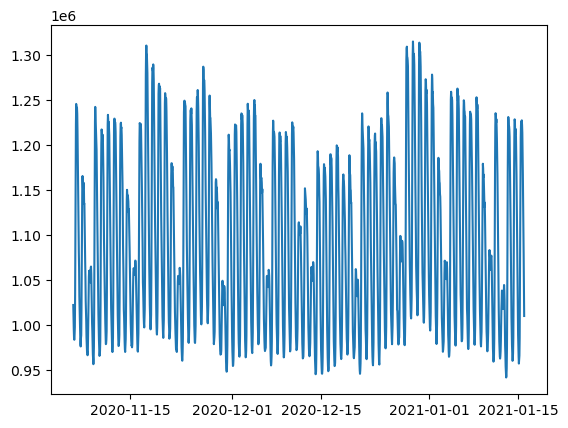

In [159]:
plt.plot(actuals_covid['Time'], actuals_covid['Load (kW)'])

Examining different days, it seems that load is highest around midday

Text(0.5, 1.0, 'Electricity demand')

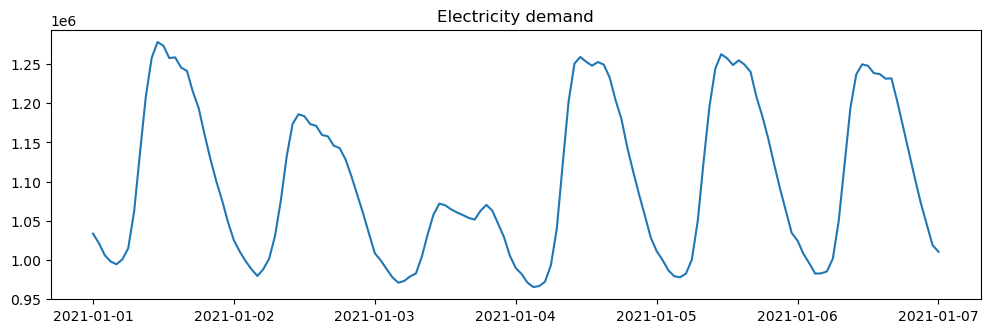

In [160]:
# Zooming time series chart
# ==============================================================================

fig, ax = plt.subplots(figsize=(12, 3.5))


data = actuals_covid[(actuals_covid['Time'] >= datetime(2021, 1, 1 , 0, 0, 0)) & (actuals_covid['Time'] <= datetime(2021, 1,7, 0, 0, 0))]

ax.plot(data.Time, data['Load (kW)'])


ax.set_title('Electricity demand')


### Detecting seasonalities:

In [161]:
temp_df_post_covid = actuals_covid

In [162]:
temp_df_post_covid['Year'] = [date.year for date in actuals_covid.Time]

In [163]:
temp_df_post_covid['Month'] = [date.month for date in actuals_covid.Time]

In [164]:
temp_df_post_covid['day'] = [date.day for date in actuals_covid.Time]

In [165]:
temp_df_post_covid['hour'] = [date.hour for date in actuals_covid.Time]

In [166]:
temp_df_post_covid['type_of_day'] = [date.weekday() + 1 for date in actuals_covid.Time]

In [167]:
temp_df_post_covid.rename(columns={'year': 'Year', 'month': 'Month'}, inplace=True)

In [168]:
temp_df_post_covid.head()

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Year,Month,day,hour,type_of_day
0,2020-11-06 00:00:00,1022463.93200,1011.00000,36.50000,71.58333,14.84939,313.12500,10.43125,2020,11,6,0,5
1,2020-11-06 01:00:00,1007171.43200,1010.50000,30.62500,73.33333,13.41439,57.87500,9.56375,2020,11,6,1,5
2,2020-11-06 02:00:00,994545.93200,1010.00000,43.37500,72.83333,12.93189,17.62500,4.87750,2020,11,6,2,5
3,2020-11-06 03:00:00,985150.43200,1009.73750,51.50000,72.66667,12.67689,24.87500,4.46750,2020,11,6,3,5
4,2020-11-06 04:00:00,983825.43200,1009.78750,54.25000,73.08333,12.31939,31.50000,4.51625,2020,11,6,4,5


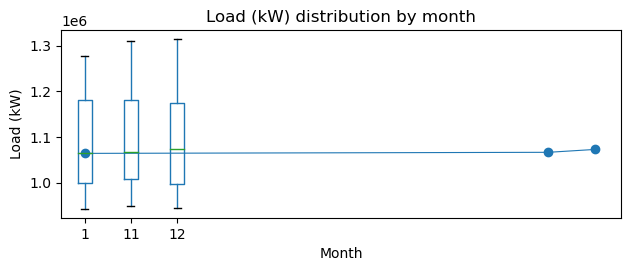

In [169]:
# Boxplot for annual seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 2.5))
temp_df_post_covid.boxplot(column='Load (kW)', by='Month', ax=ax,)
temp_df_post_covid.groupby('Month')['Load (kW)'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Load (kW)')
ax.set_title('Load (kW) distribution by month')
fig.suptitle('');

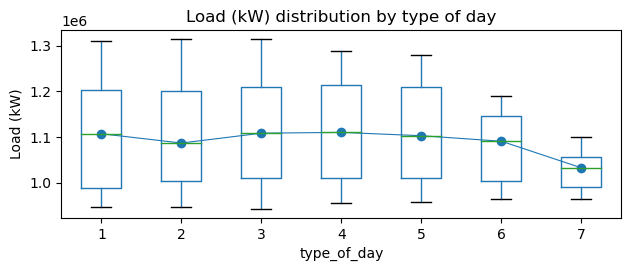

In [170]:
# Boxplot for daily seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 2.5))
temp_df_post_covid.boxplot(column='Load (kW)', by='type_of_day', ax=ax,)
temp_df_post_covid.groupby('type_of_day')['Load (kW)'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Load (kW)')
ax.set_title('Load (kW) distribution by type of day')
fig.suptitle('');

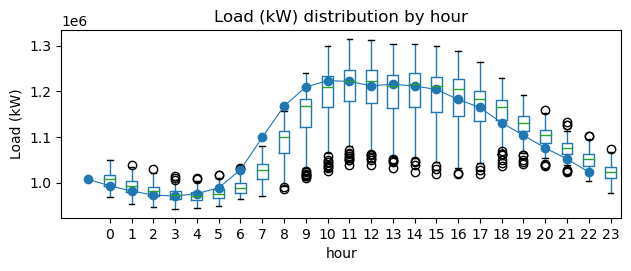

In [171]:
# Boxplot for hourly seasonality
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 2.5))
temp_df_post_covid.boxplot(column='Load (kW)', by='hour', ax=ax,)
temp_df_post_covid.groupby('hour')['Load (kW)'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Load (kW)')
ax.set_title('Load (kW) distribution by hour')
fig.suptitle('');

### Observing weather and electricity load

In [172]:
import numpy as np

In [173]:
weather_attr = ["Load (kW)", "Pressure_kpa", "Cloud Cover (%)", "Humidity (%)", 
                           "Temperature (C) ", "Wind Direction (deg)", "Wind Speed (kmh)"]

In [174]:
actuals_weather = actuals[weather_attr]
actuals_covid_weather = actuals_covid[weather_attr]

weather_corr = actuals_weather.corr()['Load (kW)']
weather_corr_covid = actuals_covid_weather.corr()['Load (kW)']

print("Pre COVID:\n",weather_corr[1:], "\n")
print("Post COVID:\n",weather_corr_covid[1:])

Pre COVID:
 Pressure_kpa           -0.05001
Cloud Cover (%)         0.01649
Humidity (%)           -0.16828
Temperature (C)         0.55730
Wind Direction (deg)    0.32851
Wind Speed (kmh)        0.45721
Name: Load (kW), dtype: float64 

Post COVID:
 Pressure_kpa            0.01886
Cloud Cover (%)         0.02758
Humidity (%)           -0.55643
Temperature (C)         0.74317
Wind Direction (deg)    0.40052
Wind Speed (kmh)        0.46645
Name: Load (kW), dtype: float64


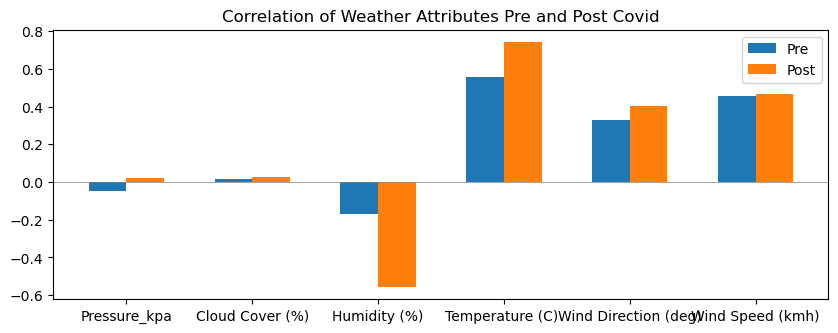

In [175]:
fig = plt.figure(figsize=(10, 3.5))

X_axis = np.arange(6)

plt.bar(X_axis-0.15, weather_corr[1:], label = "Pre", width = 0.3)
plt.bar(X_axis+0.15, weather_corr_covid[1:], label = "Post", width = 0.3)
plt.axhline(0, color='grey', linewidth="0.5")

plt.xticks(X_axis, weather_attr[1:])
plt.title("Correlation of Weather Attributes Pre and Post Covid")
plt.legend()


In [277]:
actuals[actuals['Time'] >= datetime(2017, 1, 1 , 0, 0, 0)]

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Month,Year,day,hour,type_of_day
0,2017-03-18 00:00:00,1031471.62806,1012.48000,2.12500,79.33333,16.76439,285.25000,6.25375,3,2017,18,0,6
1,2017-03-18 01:00:00,1007205.57844,1011.61875,0.00000,82.16667,15.72939,285.00000,9.20500,3,2017,18,1,6
2,2017-03-18 02:00:00,986108.40072,1010.72000,2.12500,81.66667,15.81689,316.00000,11.28375,3,2017,18,2,6
3,2017-03-18 03:00:00,970760.96692,1011.37625,17.12500,82.25000,15.91939,327.00000,7.16875,3,2017,18,3,6
4,2017-03-18 04:00:00,962258.36502,1011.50000,18.62500,82.33333,15.76939,282.25000,0.78000,3,2017,18,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31891,2020-11-05 19:00:00,1141299.02814,1010.35000,53.37500,69.33333,18.31939,342.00000,10.18625,11,2020,5,19,4
31892,2020-11-05 20:00:00,1112589.66414,1011.10000,36.87500,69.33333,17.81939,221.50000,8.77000,11,2020,5,20,4
31893,2020-11-05 21:00:00,1086038.13814,1011.56250,33.87500,69.33333,17.64189,5.12500,9.94125,11,2020,5,21,4
31894,2020-11-05 22:00:00,1062102.90214,1011.45000,58.62500,70.50000,16.49939,180.75000,10.16250,11,2020,5,22,4


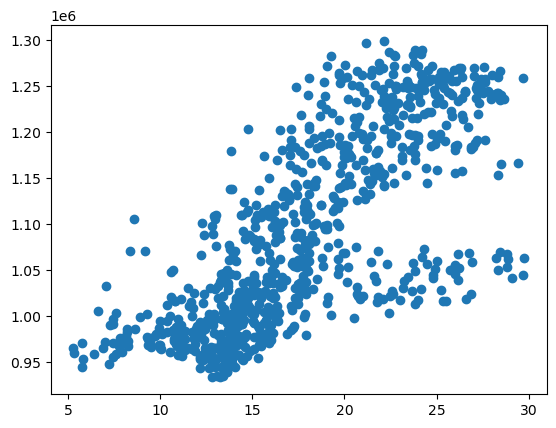

In [281]:
plt.scatter(actuals[actuals['Time'] >= datetime(2020, 10, 1 , 0, 0, 0)]['Temperature (C) '], actuals[actuals['Time'] >= datetime(2020, 10, 1 , 0, 0, 0)]['Load (kW)'])


In [267]:
actuals

,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Month,Year,day,hour,type_of_day
0,2017-03-18 00:00:00,1031471.62806,1012.48000,2.12500,79.33333,16.76439,285.25000,6.25375,3,2017,18,0,6
1,2017-03-18 01:00:00,1007205.57844,1011.61875,0.00000,82.16667,15.72939,285.00000,9.20500,3,2017,18,1,6
2,2017-03-18 02:00:00,986108.40072,1010.72000,2.12500,81.66667,15.81689,316.00000,11.28375,3,2017,18,2,6
3,2017-03-18 03:00:00,970760.96692,1011.37625,17.12500,82.25000,15.91939,327.00000,7.16875,3,2017,18,3,6
4,2017-03-18 04:00:00,962258.36502,1011.50000,18.62500,82.33333,15.76939,282.25000,0.78000,3,2017,18,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31891,2020-11-05 19:00:00,1141299.02814,1010.35000,53.37500,69.33333,18.31939,342.00000,10.18625,11,2020,5,19,4
31892,2020-11-05 20:00:00,1112589.66414,1011.10000,36.87500,69.33333,17.81939,221.50000,8.77000,11,2020,5,20,4
31893,2020-11-05 21:00:00,1086038.13814,1011.56250,33.87500,69.33333,17.64189,5.12500,9.94125,11,2020,5,21,4
31894,2020-11-05 22:00:00,1062102.90214,1011.45000,58.62500,70.50000,16.49939,180.75000,10.16250,11,2020,5,22,4


### Comparing pre and post COVID:

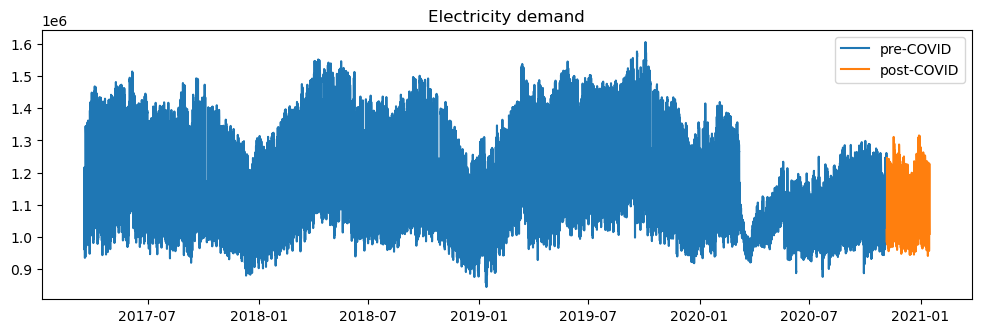

In [176]:
fig, ax = plt.subplots(figsize=(12, 3.5))

ax.plot(actuals['Time'], actuals['Load (kW)'], label='pre-COVID')
ax.plot(actuals_covid['Time'], actuals_covid['Load (kW)'], label='post-COVID')

ax.set_title('Electricity demand')
ax.legend();

## Forecast data post COVID:

In [177]:
forecast_covid = pd.read_csv("Train/Forecasts_part2.csv", parse_dates=True)

In [178]:
forecast_covid.head()

,Temperature (C),Pressure_kpa,Cloud Cover (%),Wind Direction (deg),Wind Speed (kmh),Time
0,15.72189,1011.00000,20.00000,13.00000,12.00000,6/11/2020 0:00
1,15.72189,1011.00000,22.00000,14.00000,12.00000,6/11/2020 1:00
2,15.72189,1011.00000,24.00000,15.00000,12.00000,6/11/2020 2:00
3,15.72189,1010.00000,25.00000,16.00000,11.00000,6/11/2020 3:00
4,15.72189,1010.00000,26.00000,17.00000,11.00000,6/11/2020 4:00


In [179]:
forecast_covid.dtypes

Temperature (C)         float64
Pressure_kpa            float64
Cloud Cover (%)         float64
Wind Direction (deg)    float64
Wind Speed (kmh)        float64
Time                     object
dtype: object

Convert Time to datetime

In [180]:
forecast_covid['Time'] = pd.to_datetime(forecast_covid['Time'], dayfirst = True)

In [181]:
forecast_covid.head()

,Temperature (C),Pressure_kpa,Cloud Cover (%),Wind Direction (deg),Wind Speed (kmh),Time
0,15.72189,1011.00000,20.00000,13.00000,12.00000,2020-11-06 00:00:00
1,15.72189,1011.00000,22.00000,14.00000,12.00000,2020-11-06 01:00:00
2,15.72189,1011.00000,24.00000,15.00000,12.00000,2020-11-06 02:00:00
3,15.72189,1010.00000,25.00000,16.00000,11.00000,2020-11-06 03:00:00
4,15.72189,1010.00000,26.00000,17.00000,11.00000,2020-11-06 04:00:00


### Forecast data Pre COVID 

In [182]:
cloudcover = pd.read_excel("Train/Forecasts_part1/Cloudcover_percent.xlsx", parse_dates=True)
pressure = pd.read_excel("Train/Forecasts_part1/Pressure_kpa.xlsx", parse_dates=True)
temp = pd.read_excel("Train/Forecasts_part1/Temperature_Celcius.xlsx", parse_dates=True)
winddir = pd.read_excel("Train/Forecasts_part1/Winddirection_degree.xlsx", parse_dates=True)
windsp = pd.read_excel("Train/Forecasts_part1/Windspeed_kmh.xlsx", parse_dates=True)


In [183]:
temp_fc = pd.merge(cloudcover,pressure, on="Time")
temp_fc = pd.merge(temp_fc,temp, on="Time")
temp_fc = pd.merge(temp_fc,winddir, on="Time")
temp_fc = pd.merge(temp_fc,windsp, on="Time")

In [184]:
temp_fc = temp_fc[["Time", "Cloud Cover (%)", "Pressure (kpa)", "Temperature (C)", 
                   "Wind Direction (deg)", "Wind Speed (kmh)"]]

forecast_precovid = temp_fc

#### just wanna try splitting the data into pre and post covid by 03/2020

Actuals

In [185]:
ac_precovid = actuals.loc[(actuals["Time"] < '2020-03-01')]

temp_ac_postcovid = actuals.loc[(actuals["Time"] >= '2020-03-01')]
ac_postcovid = pd.concat([temp_ac_postcovid, actuals_covid])

Forecast

In [186]:
fc = forecasts  #precovid
fcc = forecast_covid  #post covid

In [187]:
fcc = fcc.rename(columns={'Pressure_kpa':"Pressure (kpa)",
                    'Temperature (C) ':'Temperature (C)'})

In [188]:
## note: using 2020-11-06 - 2020-11-16 data from forecast_covid, not forecasts
## i'll deal with it later 
fc_precovid = fc.loc[(forecasts["Time"] < '2020-03-01')]

temp_fc_postcovid = fc.loc[(forecasts["Time"] >= '2020-03-01') & (forecasts["Time"] <= '2020-11-06')]
fc_postcovid = pd.concat([temp_fc_postcovid, fcc])


In [189]:
fc_postcovid = fc_postcovid.dropna()

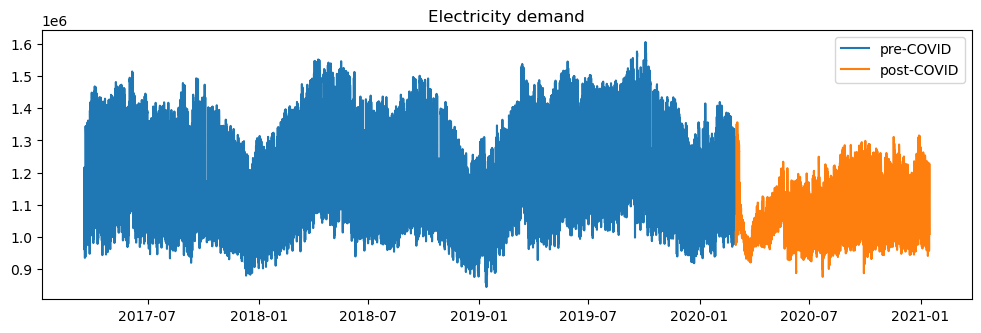

In [190]:
fig, ax = plt.subplots(figsize=(12, 3.5))

ax.plot(ac_precovid['Time'], ac_precovid['Load (kW)'], label='pre-COVID')
ax.plot(ac_postcovid['Time'], ac_postcovid['Load (kW)'], label='post-COVID')

#closer comparison to 2019 and 2020 -- uncomment to see
# plt.xlim([datetime(2019,1,1,0,0,0), datetime(2021,1,1,0,0,0)])

ax.set_title('Electricity demand')
ax.legend();

In [191]:
actuals_weather = ac_precovid[weather_attr]
actuals_covid_weather = ac_postcovid[weather_attr]

weather_corr = actuals_weather.corr()['Load (kW)']
weather_corr_covid = actuals_covid_weather.corr()['Load (kW)']

print("Pre COVID:\n",weather_corr[1:], "\n")
print("Post COVID:\n",weather_corr_covid[1:])

Pre COVID:
 Pressure_kpa           -0.15892
Cloud Cover (%)         0.09324
Humidity (%)           -0.08734
Temperature (C)         0.61360
Wind Direction (deg)    0.35525
Wind Speed (kmh)        0.51452
Name: Load (kW), dtype: float64 

Post COVID:
 Pressure_kpa            0.13879
Cloud Cover (%)        -0.09119
Humidity (%)           -0.42119
Temperature (C)         0.47652
Wind Direction (deg)    0.24518
Wind Speed (kmh)        0.19283
Name: Load (kW), dtype: float64


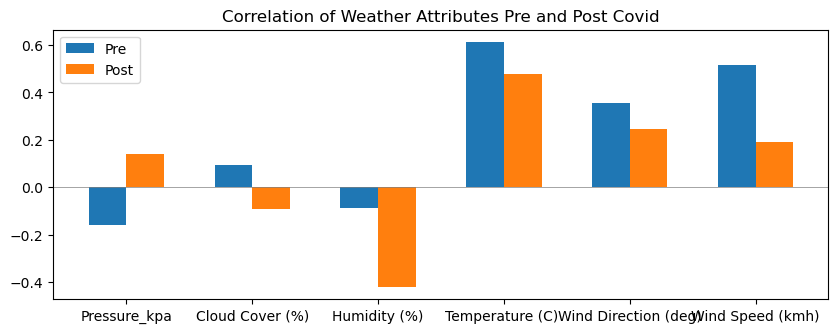

In [192]:
fig = plt.figure(figsize=(10, 3.5))

X_axis = np.arange(6)

plt.bar(X_axis-0.15, weather_corr[1:], label = "Pre", width = 0.3)
plt.bar(X_axis+0.15, weather_corr_covid[1:], label = "Post", width = 0.3)
plt.axhline(0, color='grey', linewidth="0.5")

plt.xticks(X_axis, weather_attr[1:])
plt.title("Correlation of Weather Attributes Pre and Post Covid")
plt.legend()

#### Testing the accuracy of the forecasted weather data:

error metrics we chose:

MAE
RMSE

can't use MAPE bc our actual values have 0 :-)

In [193]:
# using MAE

# uncomment to install scikit-learn and comment again when done
# !pip install scikit-learn

In [194]:
from sklearn.metrics import mean_absolute_error as mae

In [195]:
print(ac_precovid.columns)
print(fc_precovid.columns)

Index(['Time', 'Load (kW)', 'Pressure_kpa', 'Cloud Cover (%)', 'Humidity (%)',
       'Temperature (C) ', 'Wind Direction (deg)', 'Wind Speed (kmh)', 'Month',
       'Year', 'day', 'hour', 'type_of_day'],
      dtype='object')
Index(['Cloud Cover (%)', 'Time', 'Pressure (kpa)', 'Temperature (C)',
       'Wind Direction (deg)', 'Wind Speed (kmh)'],
      dtype='object')


Pre-Covid Weather Forecast Accuracy

In [196]:
print("MAE of Pressure:", 
        round(mae(ac_precovid["Pressure_kpa"], 
        fc_precovid["Pressure (kpa)"]),3), 
        "%")

print("MAE of Cloud Cover:", 
        round(mae(ac_precovid["Cloud Cover (%)"], 
        fc_precovid["Cloud Cover (%)"]),3), 
        "%")

print("MAE of Temperature:", 
        round(mae(ac_precovid["Temperature (C) "], 
        fc_precovid["Temperature (C)"]),3), 
        "%")

print("MAE of Wind Direction:", 
        round(mae(ac_precovid["Wind Direction (deg)"], 
        fc_precovid["Wind Direction (deg)"]),3), 
        "%")
        
print("MAE of Wind Speed:", 
        round(mae(ac_precovid["Wind Speed (kmh)"], 
        fc_precovid["Wind Speed (kmh)"]),3), 
        "%")


MAE of Pressure: 1.053 %
MAE of Cloud Cover: 18.231 %
MAE of Temperature: 2.895 %
MAE of Wind Direction: 48.124 %
MAE of Wind Speed: 4.568 %


Post Covid Weather Forecast Accuracy

In [197]:
ac_postcovid.tail()


,Time,Load (kW),Pressure_kpa,Cloud Cover (%),Humidity (%),Temperature (C),Wind Direction (deg),Wind Speed (kmh),Month,Year,day,hour,type_of_day
1699,2021-01-15 19:00:00,1141078.93200,1013.38750,38.37500,68.33333,11.73439,306.87500,6.63375,1,2021,15,19,5
1700,2021-01-15 20:00:00,1108896.43200,1013.97500,28.12500,73.91667,9.05689,297.62500,10.08750,1,2021,15,20,5
1701,2021-01-15 21:00:00,1078978.43200,1014.18750,21.12500,75.83333,8.41439,334.00000,8.18000,1,2021,15,21,5
1702,2021-01-15 22:00:00,1044494.93200,1014.12500,17.37500,74.25000,8.04189,73.62500,4.12250,1,2021,15,22,5
1703,2021-01-15 23:00:00,1010233.93200,1013.90000,13.25000,77.25000,6.54189,37.62500,2.87000,1,2021,15,23,5


In [198]:
fc_postcovid.tail()

,Cloud Cover (%),Time,Pressure (kpa),Temperature (C),Wind Direction (deg),Wind Speed (kmh)
1699,0.00000,2021-01-15 19:00:00,1013.00000,15.72189,290.00000,14.00000
1700,0.00000,2021-01-15 20:00:00,1013.00000,13.72189,262.00000,13.00000
1701,0.00000,2021-01-15 21:00:00,1014.00000,11.72189,233.00000,12.00000
1702,1.00000,2021-01-15 22:00:00,1014.00000,9.72189,160.00000,11.00000
1703,2.00000,2021-01-15 23:00:00,1014.00000,7.72189,87.00000,11.00000


In [199]:
fc_postcovid.isnull().sum()

Cloud Cover (%)         0
Time                    0
Pressure (kpa)          0
Temperature (C)         0
Wind Direction (deg)    0
Wind Speed (kmh)        0
dtype: int64

In [200]:
print("MAE of Pressure:", 
        round(mae(ac_postcovid["Pressure_kpa"], 
        fc_postcovid["Pressure (kpa)"]),3), 
        "%")

print("MAE of Cloud Cover:", 
        round(mae(ac_postcovid["Cloud Cover (%)"], 
        fc_postcovid["Cloud Cover (%)"]),3), 
        "%")

print("MAE of Temperature:", 
        round(mae(ac_precovid["Temperature (C) "], 
        fc_precovid["Temperature (C)"]),3), 
        "%")

print("MAE of Wind Direction:", 
        round(mae(ac_precovid["Wind Direction (deg)"], 
        fc_precovid["Wind Direction (deg)"]),3), 
        "%")
        
print("MAE of Wind Speed:", 
        round(mae(ac_precovid["Wind Speed (kmh)"], 
        fc_precovid["Wind Speed (kmh)"]),3), 
        "%")

MAE of Pressure: 0.538 %
MAE of Cloud Cover: 17.998 %
MAE of Temperature: 2.895 %
MAE of Wind Direction: 48.124 %
MAE of Wind Speed: 4.568 %


## Testing benchmark models:

In [201]:
#uncomment to install if you havent, comment once you're done
# !pip install statsforecast

Assuming now we're using part 1 for training:

In [225]:
train_data = actuals.copy()

In [226]:
train_data.shape

(31896, 13)

In [227]:
test_data = actuals_covid.copy()

### Method 1: naive

In [236]:
last_load = train_data['Load (kW)'][len(train_data)-1]

In [253]:
naive_predictions = pd.DataFrame(test_data['Time'].copy())

In [256]:
naive_predictions.head()

,Time,load
0,2020-11-06 00:00:00,1022583.90014
1,2020-11-06 01:00:00,1022583.90014
2,2020-11-06 02:00:00,1022583.90014
3,2020-11-06 03:00:00,1022583.90014
4,2020-11-06 04:00:00,1022583.90014


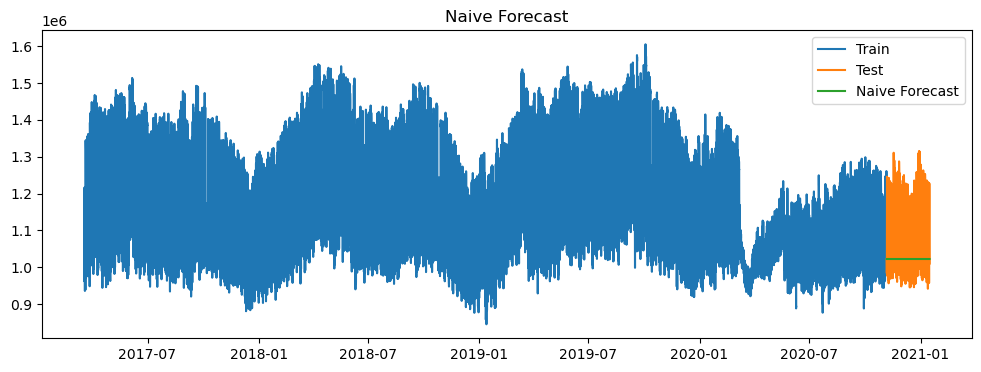

In [259]:
plt.figure(figsize=(12,4))
plt.plot(train_data['Time'], train_data['Load (kW)'], label='Train')
plt.plot(test_data['Time'], test_data['Load (kW)'], label='Test')
plt.plot(naive_predictions['Time'], naive_predictions['load'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

### Method 2: Seasonal naive

In [282]:
# !pip install r-functions 

In [285]:
import subprocess